In [11]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

/Users/wangjialei/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(540, 2500) (540,)


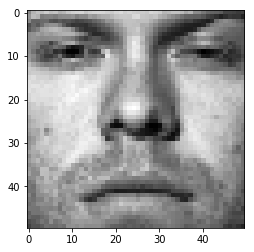

In [21]:
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print train_data.shape, train_labels.shape
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

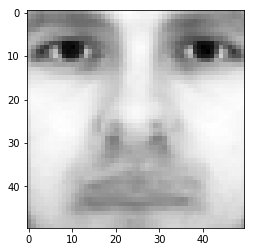

In [70]:
averageface = np.mean(train_data, axis=0)
plt.imshow(averageface.reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [72]:
Mean_Subtraction_face = train_data - averageface

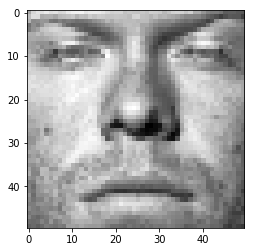

In [73]:
plt.imshow(Mean_Subtraction_face[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [55]:
u, sigma ,v_transpose = np.linalg.svd(Mean_Subtraction_face)


In [52]:
print u.shape, sigma.shape, v_transpose.shape

(540, 540) (540,) (2500, 2500)


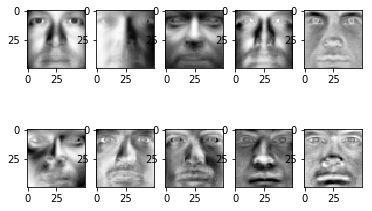

In [54]:
for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(v_transpose[i].reshape(50,50), cmap = cm.Greys_r)
plt.show()

<function matplotlib.pyplot.show>

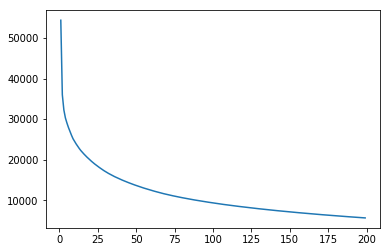

In [58]:
error = []
for r in range(1,200):
    x_hat = u[:,: r ].dot(np.diag(sigma[:r])).dot(v_transpose[: r,:])
    k = np.linalg.norm(x_hat - Mean_Subtraction_face)
    error.append(k)
plt.plot(range(1,200),error)
plt.show

In [64]:
def gen_f(r,x,v):
    t = np.transpose(v[: r,:])
    return x.dot(t)

In [67]:
train = gen_f(10,Mean_Subtraction_face,v_transpose)

(100, 2500) (100,)


/Users/wangjialei/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


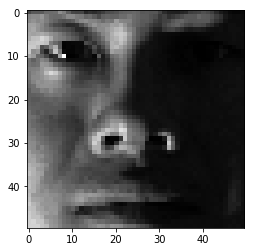

In [68]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print test_data.shape, test_labels.shape
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [75]:
Mean_Subtraction_face_test = test_data - averageface

In [76]:
test = gen_f(10,Mean_Subtraction_face_test,v_transpose)

In [84]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(train, train_labels)
clf.predict(test)

array([ 7,  1,  1,  3,  1,  1,  1,  1,  1,  7,  3,  2,  6,  2,  2,  2,  2,
        2,  2,  3,  2,  2,  3,  3,  3,  5,  3,  3,  3,  3,  7,  4,  4,  4,
        7,  4,  4,  4,  4,  4,  5,  5,  5,  2,  5,  5,  5,  2,  5,  5,  6,
        6,  6,  1,  6,  6,  6,  6,  6,  6,  7,  7,  3,  7,  7,  6,  7,  7,
        7,  5,  8,  8,  8,  8,  8,  9,  4,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [85]:
clf.score(test, test_labels)

0.8

In [87]:
scores = []
for r in range(1,200):
    train = gen_f(r,Mean_Subtraction_face,v_transpose)
    test = gen_f(r,Mean_Subtraction_face_test,v_transpose)
    clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(train, train_labels)
    score = clf.score(test, test_labels)
    scores.append(score)

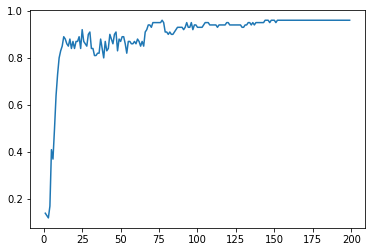

In [88]:
plt.plot(range(1,200),scores)
plt.show()